<a href="https://colab.research.google.com/github/gregorywmorris/guided_projects/blob/main/time_series/Greg_Hogg/Multivariate%20Time%20Series%20Forecasting%20Using%20LSTM%2C%20GRU%20%26%201d%20CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

[LSTM Time Series Forecasting Tutorial in Python
](https://www.youtube.com/watch?v=c0k-YLQGKjY)

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 0s 0us/step


In [3]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [4]:
# Data is every 10 minutes, this counts by 6 to give us every hour
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [5]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:24]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


<Axes: xlabel='Date Time'>

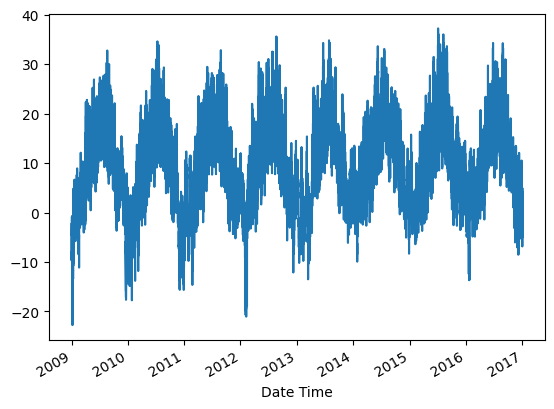

In [6]:
temp = df['T (degC)']
temp.plot()

In [7]:
# Window[x]         Prediction[y]
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [8]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((70086, 5, 1), (70086,))

In [9]:
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [11]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [12]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1871/1875 [============================>.] - ETA: 0s - loss: 60.2546 - root_mean_squared_error: 7.7624

1875/1875 [==============================] - 32s 16ms/step - loss: 60.1536 - root_mean_squared_error: 7.7559 - val_loss: 2.7317 - val_root_mean_squared_error: 1.6528
Epoch 2/10
1870/1875 [============================>.] - ETA: 0s - loss: 5.1280 - root_mean_squared_error: 2.2645

1875/1875 [==============================] - 16s 9ms/step - loss: 5.1181 - root_mean_squared_error: 2.2623 - val_loss: 0.6899 - val_root_mean_squared_error: 0.8306
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 1.3735 - root_mean_squared_error: 1.1720

1875/1875 [==============================] - 16s 8ms/step - loss: 1.3735 - root_mean_squared_error: 1.1720 - val_loss: 0.5588 - val_root_mean_squared_error: 0.7475
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8349 - root_mean_squared_error: 0.9137 - val_loss: 0.5840 - val_root_mean_squared_error: 0.7642
Epoch 5/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.7160 - root_mean_squared_error: 0.8462

1875/1875 [==============================] - 17s 9ms/step - loss: 0.7159 - root_mean_squared_error: 0.8461 - val_loss: 0.5058 - val_root_mean_squared_error: 0.7112
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6815 - root_mean_squared_error: 0.8256 - val_loss: 0.5066 - val_root_mean_squared_error: 0.7118
Epoch 7/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.6666 - root_mean_squared_error: 0.8165

1875/1875 [==============================] - 22s 12ms/step - loss: 0.6667 - root_mean_squared_error: 0.8165 - val_loss: 0.4964 - val_root_mean_squared_error: 0.7046
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6593 - root_mean_squared_error: 0.8120 - val_loss: 0.5007 - val_root_mean_squared_error: 0.7076
Epoch 9/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.6535 - root_mean_squared_error: 0.8084

1875/1875 [==============================] - 22s 12ms/step - loss: 0.6540 - root_mean_squared_error: 0.8087 - val_loss: 0.4929 - val_root_mean_squared_error: 0.7021
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6506 - root_mean_squared_error: 0.8066 - val_loss: 0.4981 - val_root_mean_squared_error: 0.7058


In [13]:
# load the saved model
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [14]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1875/1875 [==============================] - 11s 6ms/step


,Train Predictions,Actuals
0,-9.709962,-9.67
1,-9.543835,-9.17
2,-8.719626,-8.10
3,-7.309615,-7.66
4,-7.088613,-7.04
...,...,...
59995,6.232236,6.07
59996,7.238575,9.88
59997,12.505942,13.53
59998,15.839409,15.43


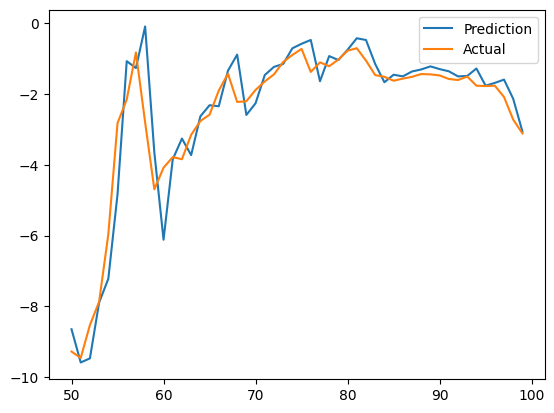

In [15]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])
plt.legend(['Prediction','Actual'])

In [16]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

157/157 [==============================] - 1s 3ms/step


,Val Predictions,Actuals
0,15.598977,14.02
1,13.376417,13.67
2,13.158778,12.27
3,11.558631,11.19
4,10.470344,10.85
...,...,...
4995,17.342440,18.27
4996,17.501146,17.85
4997,17.323107,16.65
4998,16.001196,15.85


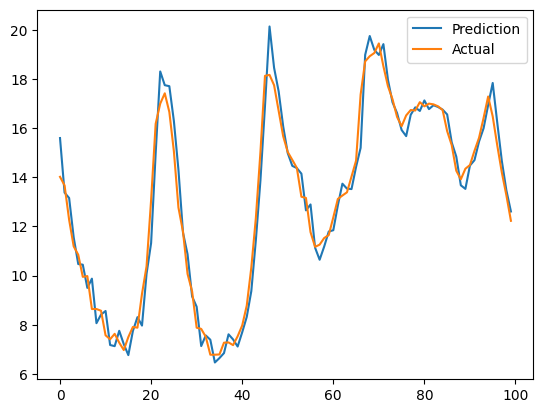

In [17]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])
plt.legend(['Prediction','Actual'])

In [18]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

159/159 [==============================] - 1s 3ms/step


,Test Predictions,Actuals
0,14.519771,13.99
1,13.357121,13.46
2,12.974573,12.93
3,12.557888,12.43
4,12.113648,12.17
...,...,...
5081,-1.112705,-0.98
5082,-1.378773,-1.40
5083,-1.500674,-2.75
5084,-3.305466,-2.89


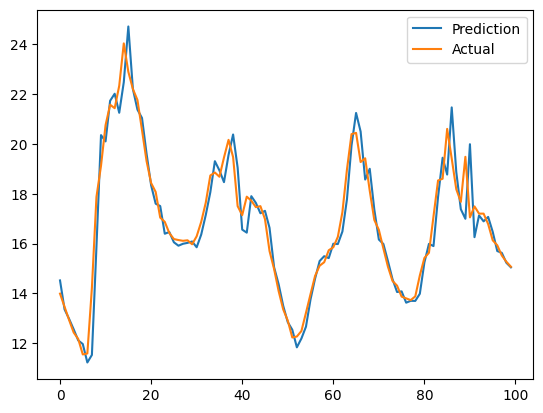

In [19]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])
plt.legend(['Prediction','Actual'])

# Part 2

[Multivariate Time Series Forecasting Using LSTM, GRU & 1d CNNs
](https://www.youtube.com/watch?v=kGdbPnMCdOg)

In [20]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100): # start/end is for plotting
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  rmse = mse(y, predictions, squared=False)

  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  plt.legend(['Predictions','Actuals'])

  return df, rmse

159/159 [==============================] - 0s 3ms/step


(      Predictions  Actuals
 0       14.519771    13.99
 1       13.357121    13.46
 2       12.974573    12.93
 3       12.557888    12.43
 4       12.113648    12.17
 ...           ...      ...
 5081    -1.112705    -0.98
 5082    -1.378773    -1.40
 5083    -1.500674    -2.75
 5084    -3.305466    -2.89
 5085    -3.048545    -3.93
 
 [5086 rows x 2 columns],
 0.7845942604699556)

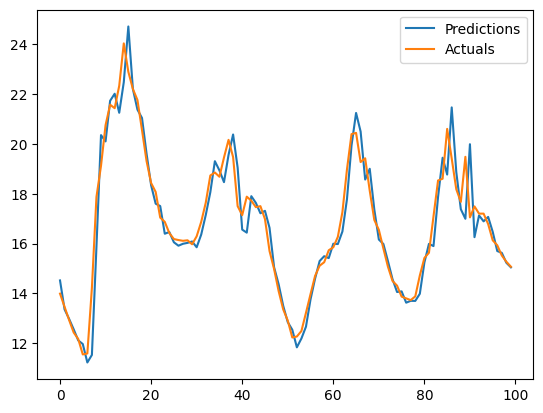

In [21]:
plot_predictions1(model1, X_test1, y_test1)

In [22]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()
# notice Conv1D uses less params than LSTM near 17k compared to 2.5k

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [23]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [24]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1871/1875 [============================>.] - ETA: 0s - loss: 5.0159 - root_mean_squared_error: 2.2396

1875/1875 [==============================] - 7s 3ms/step - loss: 5.0074 - root_mean_squared_error: 2.2377 - val_loss: 0.9783 - val_root_mean_squared_error: 0.9891
Epoch 2/10
1871/1875 [============================>.] - ETA: 0s - loss: 1.0766 - root_mean_squared_error: 1.0376

1875/1875 [==============================] - 14s 8ms/step - loss: 1.0766 - root_mean_squared_error: 1.0376 - val_loss: 0.6799 - val_root_mean_squared_error: 0.8246
Epoch 3/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.8002 - root_mean_squared_error: 0.8945

1875/1875 [==============================] - 6s 3ms/step - loss: 0.7995 - root_mean_squared_error: 0.8942 - val_loss: 0.5512 - val_root_mean_squared_error: 0.7424
Epoch 4/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.7057 - root_mean_squared_error: 0.8401

1875/1875 [==============================] - 7s 4ms/step - loss: 0.7059 - root_mean_squared_error: 0.8402 - val_loss: 0.5437 - val_root_mean_squared_error: 0.7374
Epoch 5/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.6820 - root_mean_squared_error: 0.8258

1875/1875 [==============================] - 9s 5ms/step - loss: 0.6821 - root_mean_squared_error: 0.8259 - val_loss: 0.5013 - val_root_mean_squared_error: 0.7080
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6702 - root_mean_squared_error: 0.8187 - val_loss: 0.5049 - val_root_mean_squared_error: 0.7105
Epoch 7/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.6643 - root_mean_squared_error: 0.8150

1875/1875 [==============================] - 9s 5ms/step - loss: 0.6639 - root_mean_squared_error: 0.8148 - val_loss: 0.4935 - val_root_mean_squared_error: 0.7025
Epoch 8/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.6617 - root_mean_squared_error: 0.8135

1875/1875 [==============================] - 6s 3ms/step - loss: 0.6629 - root_mean_squared_error: 0.8142 - val_loss: 0.4923 - val_root_mean_squared_error: 0.7017
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6622 - root_mean_squared_error: 0.8138 - val_loss: 0.4980 - val_root_mean_squared_error: 0.7057
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6598 - root_mean_squared_error: 0.8123 - val_loss: 0.5016 - val_root_mean_squared_error: 0.7083


In [25]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [26]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [27]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1873/1875 [============================>.] - ETA: 0s - loss: 66.1244 - root_mean_squared_error: 8.1317

1875/1875 [==============================] - 18s 8ms/step - loss: 66.0969 - root_mean_squared_error: 8.1300 - val_loss: 5.5583 - val_root_mean_squared_error: 2.3576
Epoch 2/10
1871/1875 [============================>.] - ETA: 0s - loss: 11.0463 - root_mean_squared_error: 3.3236

1875/1875 [==============================] - 16s 8ms/step - loss: 11.0327 - root_mean_squared_error: 3.3215 - val_loss: 0.9791 - val_root_mean_squared_error: 0.9895
Epoch 3/10
1873/1875 [============================>.] - ETA: 0s - loss: 2.6023 - root_mean_squared_error: 1.6132

1875/1875 [==============================] - 18s 10ms/step - loss: 2.6028 - root_mean_squared_error: 1.6133 - val_loss: 0.6007 - val_root_mean_squared_error: 0.7751
Epoch 4/10
1872/1875 [============================>.] - ETA: 0s - loss: 1.1373 - root_mean_squared_error: 1.0664

1875/1875 [==============================] - 18s 9ms/step - loss: 1.1363 - root_mean_squared_error: 1.0660 - val_loss: 0.5166 - val_root_mean_squared_error: 0.7188
Epoch 5/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.7935 - root_mean_squared_error: 0.8908

1875/1875 [==============================] - 18s 10ms/step - loss: 0.7946 - root_mean_squared_error: 0.8914 - val_loss: 0.5031 - val_root_mean_squared_error: 0.7093
Epoch 6/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.7021 - root_mean_squared_error: 0.8379

1875/1875 [==============================] - 15s 8ms/step - loss: 0.7021 - root_mean_squared_error: 0.8379 - val_loss: 0.4956 - val_root_mean_squared_error: 0.7040
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6744 - root_mean_squared_error: 0.8212 - val_loss: 0.5030 - val_root_mean_squared_error: 0.7092
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6614 - root_mean_squared_error: 0.8133 - val_loss: 0.5010 - val_root_mean_squared_error: 0.7078
Epoch 9/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.6550 - root_mean_squared_error: 0.8093

1875/1875 [==============================] - 16s 9ms/step - loss: 0.6550 - root_mean_squared_error: 0.8093 - val_loss: 0.4908 - val_root_mean_squared_error: 0.7006
Epoch 10/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6495 - root_mean_squared_error: 0.8059

1875/1875 [==============================] - 16s 9ms/step - loss: 0.6509 - root_mean_squared_error: 0.8068 - val_loss: 0.4900 - val_root_mean_squared_error: 0.7000


In [28]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


[Cyclical features encoding, it’s about time!](https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca)

In [29]:
# sin /cos better captures the cyclic nature vs the ever increasing nature of total seconds
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [30]:
# seconds would cause a collinearity with the sin/cos features
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [31]:
# create the set of data (for each variable) for a given time. And those features are used for the prediction
# for example temp and Day sin = [[[t1, ds1],[t2,ds2],[t3,ds3],....]]
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [32]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [33]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [34]:
temp_training_mean = np.mean(X2_train[:, :, 0]) # rows,time steps,features. 0 selects the temp
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [35]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

In [36]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [37]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [38]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1871/1875 [============================>.] - ETA: 0s - loss: 35.8032 - root_mean_squared_error: 5.9836

1875/1875 [==============================] - 20s 9ms/step - loss: 35.7478 - root_mean_squared_error: 5.9789 - val_loss: 3.9033 - val_root_mean_squared_error: 1.9757
Epoch 2/10
1868/1875 [============================>.] - ETA: 0s - loss: 4.5982 - root_mean_squared_error: 2.1443

1875/1875 [==============================] - 19s 10ms/step - loss: 4.5902 - root_mean_squared_error: 2.1425 - val_loss: 1.8559 - val_root_mean_squared_error: 1.3623
Epoch 3/10
1866/1875 [============================>.] - ETA: 0s - loss: 1.9082 - root_mean_squared_error: 1.3814

1875/1875 [==============================] - 19s 10ms/step - loss: 1.9040 - root_mean_squared_error: 1.3798 - val_loss: 1.0078 - val_root_mean_squared_error: 1.0039
Epoch 4/10
1869/1875 [============================>.] - ETA: 0s - loss: 1.0144 - root_mean_squared_error: 1.0072

1875/1875 [==============================] - 18s 10ms/step - loss: 1.0132 - root_mean_squared_error: 1.0066 - val_loss: 0.6623 - val_root_mean_squared_error: 0.8138
Epoch 5/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.7492 - root_mean_squared_error: 0.8656

1875/1875 [==============================] - 18s 9ms/step - loss: 0.7489 - root_mean_squared_error: 0.8654 - val_loss: 0.5388 - val_root_mean_squared_error: 0.7340
Epoch 6/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.6267 - root_mean_squared_error: 0.7917

1875/1875 [==============================] - 26s 14ms/step - loss: 0.6268 - root_mean_squared_error: 0.7917 - val_loss: 0.4612 - val_root_mean_squared_error: 0.6791
Epoch 7/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.5682 - root_mean_squared_error: 0.7538

1875/1875 [==============================] - 18s 9ms/step - loss: 0.5679 - root_mean_squared_error: 0.7536 - val_loss: 0.4359 - val_root_mean_squared_error: 0.6602
Epoch 8/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.5433 - root_mean_squared_error: 0.7371

1875/1875 [==============================] - 19s 10ms/step - loss: 0.5431 - root_mean_squared_error: 0.7370 - val_loss: 0.4198 - val_root_mean_squared_error: 0.6479
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5327 - root_mean_squared_error: 0.7298 - val_loss: 0.4533 - val_root_mean_squared_error: 0.6732
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5294 - root_mean_squared_error: 0.7276 - val_loss: 0.4261 - val_root_mean_squared_error: 0.6527


159/159 [==============================] - 1s 2ms/step


(      Predictions  Actuals
 0       13.106953    13.46
 1       12.689312    12.93
 2       12.284487    12.43
 3       11.970301    12.17
 4       12.062223    11.55
 ...           ...      ...
 5080    -1.104184    -0.98
 5081    -1.445854    -1.40
 5082    -1.688022    -2.75
 5083    -3.059529    -2.89
 5084    -3.073725    -3.93
 
 [5085 rows x 2 columns],
 0.6966789709199991)

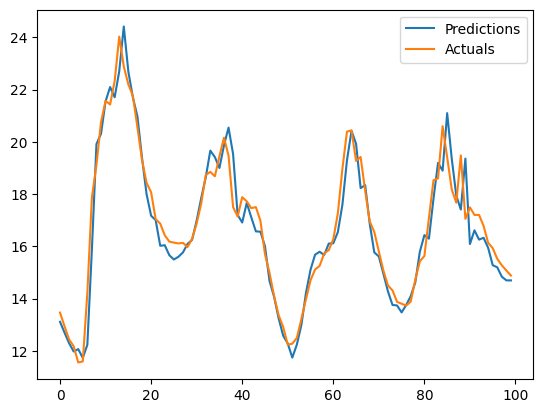

In [39]:
plot_predictions1(model4, X2_test, y2_test)

**Adding predicting pressure**

In [40]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [41]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [42]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [43]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [44]:
p_training_mean3 = np.mean(X3_train[:, :, 0]) # temp
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1]) # pressure
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [45]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [46]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [48]:
model5 = Sequential()
model5.add(InputLayer((7, 6))) # window, features
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear')) # predicting temp and pressure

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [49]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [50]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.1180 - root_mean_squared_error: 0.3435

1875/1875 [==============================] - 25s 11ms/step - loss: 0.1180 - root_mean_squared_error: 0.3435 - val_loss: 0.0302 - val_root_mean_squared_error: 0.1739
Epoch 2/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0225 - root_mean_squared_error: 0.1500

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0225 - root_mean_squared_error: 0.1499 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1229
Epoch 3/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0109 - root_mean_squared_error: 0.1042

1875/1875 [==============================] - 20s 11ms/step - loss: 0.0109 - root_mean_squared_error: 0.1042 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0832
Epoch 4/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.0830

1875/1875 [==============================] - 21s 11ms/step - loss: 0.0069 - root_mean_squared_error: 0.0830 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0715
Epoch 5/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0764

1875/1875 [==============================] - 22s 12ms/step - loss: 0.0058 - root_mean_squared_error: 0.0764 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0669
Epoch 6/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0734

1875/1875 [==============================] - 20s 10ms/step - loss: 0.0054 - root_mean_squared_error: 0.0734 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0633
Epoch 7/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0717

1875/1875 [==============================] - 20s 11ms/step - loss: 0.0051 - root_mean_squared_error: 0.0717 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0622
Epoch 8/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0708

1875/1875 [==============================] - 21s 11ms/step - loss: 0.0050 - root_mean_squared_error: 0.0708 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0621
Epoch 9/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0701

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0049 - root_mean_squared_error: 0.0701 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0610
Epoch 10/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0697

1875/1875 [==============================] - 20s 11ms/step - loss: 0.0049 - root_mean_squared_error: 0.0697 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0606


In [70]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  plt.legend(['Predictions','Actuals'])
  plt.legend(['Predictions','Actuals'])
  plt.title('Temperature and Pressure')
  return df[start:end]

159/159 [==============================] - 1s 4ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.417993,0.412451,-0.795589,-0.793439
1,0.370774,0.353683,-0.784196,-0.763123
2,0.328976,0.323123,-0.748730,-0.721893
3,0.332293,0.250251,-0.695232,-0.652773
4,0.295929,0.254952,-0.606073,-0.652773
...,...,...,...,...
95,0.700694,0.716869,-0.417469,-0.416310
96,0.660662,0.687485,-0.419238,-0.399333
97,0.642048,0.663978,-0.402431,-0.399333
98,0.643101,0.641646,-0.393037,-0.400546


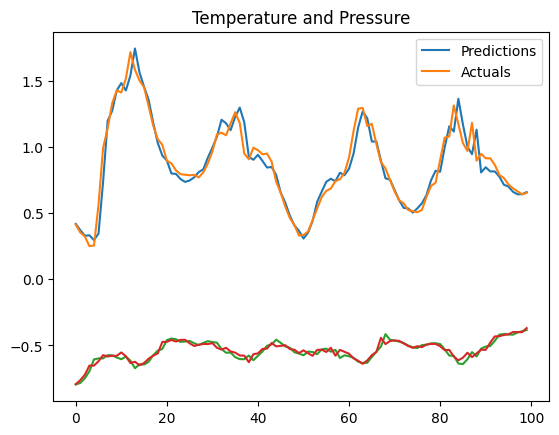

In [71]:
plot_predictions2(model5, X3_test, y3_test)

In [53]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [56]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  plt.legend(['Predictions','Actuals'])
  return df[start:end]

159/159 [==============================] - 1s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.977153,12.93,982.412292,982.43
1,12.575414,12.43,982.506226,982.68
2,12.219793,12.17,982.798706,983.02
3,12.248014,11.55,983.239868,983.59
4,11.938630,11.59,983.975159,983.59
...,...,...,...,...
95,15.382380,15.52,985.530457,985.54
96,15.041790,15.27,985.515869,985.68
97,14.883421,15.07,985.654480,985.68
98,14.892374,14.88,985.731934,985.67


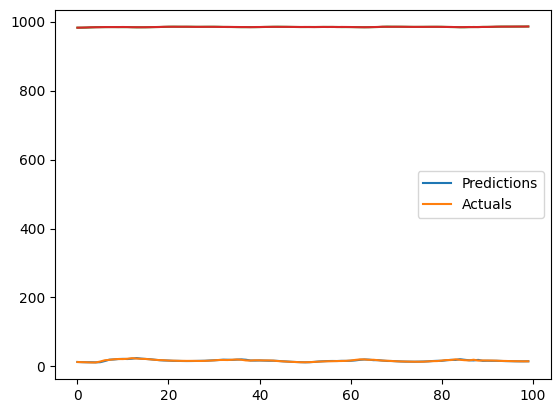

In [57]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df

Text(0.5, 1.0, 'Temperature')

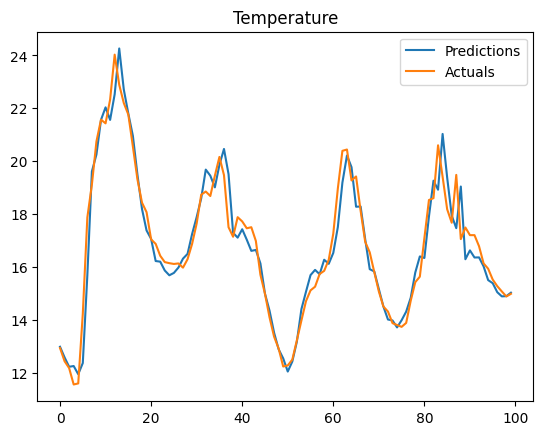

In [66]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])
plt.legend(['Predictions','Actuals'])
plt.title('Temperature')

Text(0.5, 1.0, 'Pressure')

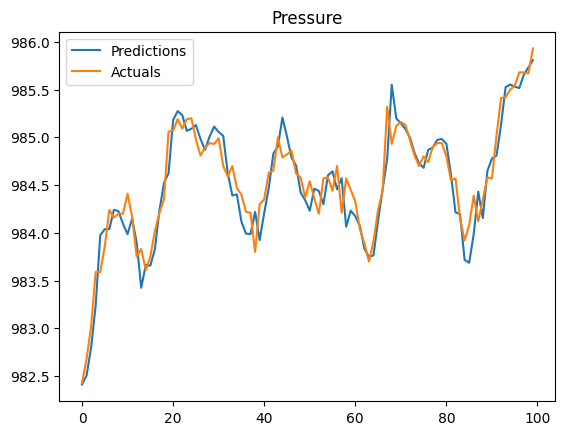

In [67]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])
plt.legend(['Predictions','Actuals'])
plt.title('Pressure')

In [60]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 32)             4992      
                                                                 
 lstm_4 (LSTM)               (None, 64)                24832     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 30,362
Trainable params: 30,362
Non-trainable params: 0
_________________________________________________________________


In [61]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [62]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.1355 - root_mean_squared_error: 0.3681

1875/1875 [==============================] - 38s 18ms/step - loss: 0.1354 - root_mean_squared_error: 0.3679 - val_loss: 0.0458 - val_root_mean_squared_error: 0.2139
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0356 - root_mean_squared_error: 0.1887

1875/1875 [==============================] - 36s 19ms/step - loss: 0.0356 - root_mean_squared_error: 0.1887 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1673
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0191 - root_mean_squared_error: 0.1382

1875/1875 [==============================] - 35s 19ms/step - loss: 0.0191 - root_mean_squared_error: 0.1382 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1071
Epoch 4/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0107 - root_mean_squared_error: 0.1033

1875/1875 [==============================] - 35s 19ms/step - loss: 0.0107 - root_mean_squared_error: 0.1033 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0879
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.0911

1875/1875 [==============================] - 34s 18ms/step - loss: 0.0083 - root_mean_squared_error: 0.0911 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0790
Epoch 6/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.0833

1875/1875 [==============================] - 36s 19ms/step - loss: 0.0069 - root_mean_squared_error: 0.0833 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0733
Epoch 7/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0777

1875/1875 [==============================] - 34s 18ms/step - loss: 0.0060 - root_mean_squared_error: 0.0777 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0692
Epoch 8/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.0747

1875/1875 [==============================] - 38s 20ms/step - loss: 0.0056 - root_mean_squared_error: 0.0747 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0655
Epoch 9/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0733

1875/1875 [==============================] - 33s 18ms/step - loss: 0.0054 - root_mean_squared_error: 0.0733 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0641
Epoch 10/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0726

1875/1875 [==============================] - 33s 18ms/step - loss: 0.0053 - root_mean_squared_error: 0.0726 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0631


In [72]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

cp7 = ModelCheckpoint('model7/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 6, 64)             832       
                                                                 
 flatten_2 (Flatten)         (None, 384)               0         
                                                                 
 dense_14 (Dense)            (None, 8)                 3080      
                                                                 
 dense_15 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,930
Trainable params: 3,930
Non-trainable params: 0
_________________________________________________________________


In [64]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.0977 - root_mean_squared_error: 0.3126

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0971 - root_mean_squared_error: 0.3116 - val_loss: 0.0167 - val_root_mean_squared_error: 0.1292
Epoch 2/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.1136

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0935
Epoch 3/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0090 - root_mean_squared_error: 0.0948

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0090 - root_mean_squared_error: 0.0948 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0850
Epoch 4/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.0875

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0076 - root_mean_squared_error: 0.0874 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0787
Epoch 5/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.0831

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0069 - root_mean_squared_error: 0.0831 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0753
Epoch 6/10
1857/1875 [============================>.] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.0805

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0065 - root_mean_squared_error: 0.0804 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0733
Epoch 7/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0784

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0062 - root_mean_squared_error: 0.0784 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0708
Epoch 8/10
1858/1875 [============================>.] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0774

1875/1875 [==============================] - 7s 3ms/step - loss: 0.0060 - root_mean_squared_error: 0.0774 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0698
Epoch 9/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0762

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0058 - root_mean_squared_error: 0.0762 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0694
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0057 - root_mean_squared_error: 0.0756 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0704
